# DRAGON REAL ESTATE PRICE PREDICTOR 📈📉

- WE NEED TO PREDICT THE PRICES OF THE HOUSES BASED ON THE OLDER DATA WHICH IS BEING PROVIDED BY A COMPANY. WE NEED TO BUILD A MODEL THAT CAN BE USED TO PREDICT THE PRICES ACCURATELY.
- FEATURES : NO. OF BATHROOMS, BEDROOMS ETC.
- REAL-WORLD PROBLEM

In [90]:
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_openml
import pandas as pd 

boston = fetch_openml(name='boston', version=1, as_frame=True)
housing = boston.frame  # Get it as a Pandas DataFrame

In [91]:
# 
# ! As the process of extracting the dataset is tough, so we are using fetch_openml to fetch the dataset then convert it to 
# ! CSV file thru pandas.to_csv() function
#
# housing.to_csv("Boston-City-Housing.csv",index=False)

In [92]:
# print(housing.info())
# print(housing["CHAS"].value_counts())
# print(housing.describe())

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt 
# housing.hist(bins=50, figsize=(20, 15))

### Train-Test Splitting

In [94]:
# import numpy as np

# def split_train_test(data, test_ratio):
#     np.
# random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

# train_set, test_set = split_train_test(housing, 0.2)

# print(f"Rows in train set: {len(train_set)}\nRows in train set: {len(test_set)}")

#### We can use the above implementation but there is a built-in library for this purpose

In [95]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(f"Rows in train set: {len(train_set)}\nRows in train set: {len(test_set)}")


Rows in train set: 404
Rows in train set: 102


In [96]:
from sklearn.model_selection import StratifiedShuffleSplit

# for good ratio shuffling we use stratified shuffle split

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)

for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [97]:
# strat_train_set.describe()
# a = strat_train_set['CHAS'].value_counts()
# b = strat_test_set['CHAS'].value_counts()
# print("Check the ratio of both a and b :\n",a,b)

### LOOKING FOR CORRELATIONS 

In [98]:
corr_matrix = housing.corr()

In [99]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

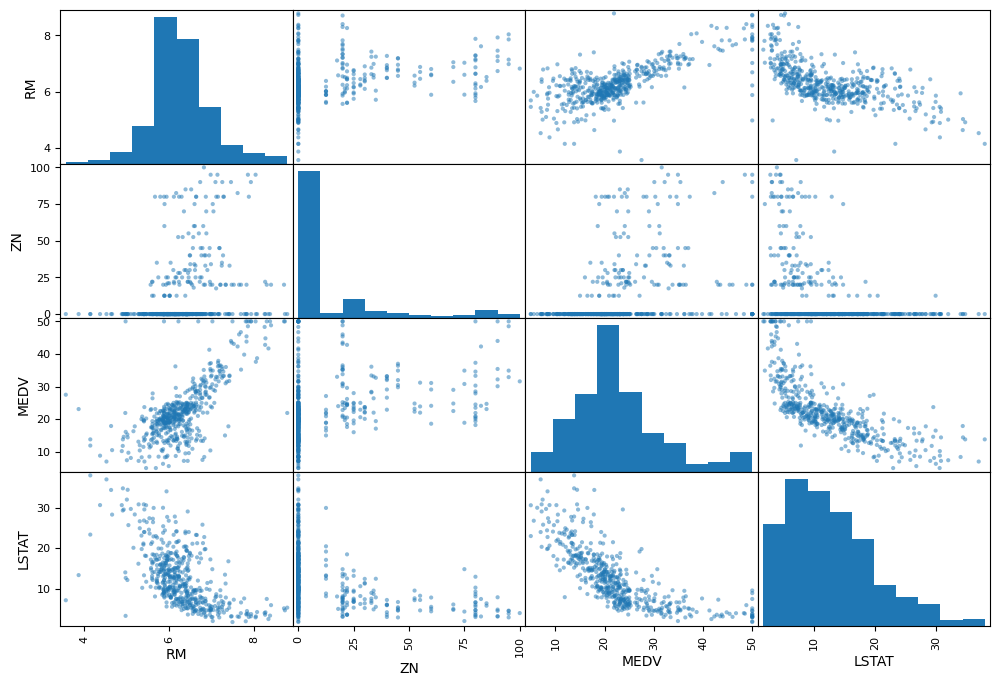

In [100]:
from pandas.plotting import scatter_matrix
attributes = ["RM", "ZN", "MEDV","LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

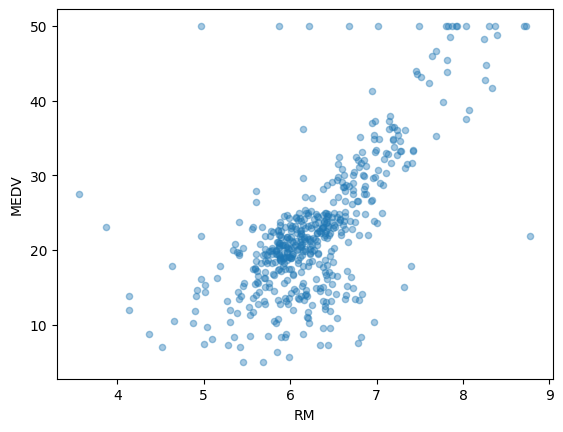

In [101]:
housing.plot(kind="scatter", x="RM", y="MEDV",alpha=0.4)

In [102]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

TRYING OUT ATTRIBUTE COMBINATIONS 

In [103]:
# housing["TaxRM"] = housing['TAX'] / housing['RM']
# housing.head()

In [104]:
corr_matrix = housing.corr()
# corr_matrix['MEDV'].sort_values(ascending=False)

In [105]:
# housing.plot(kind="scatter", x="TaxRM", y = "MEDV",alpha=0.8)

#### To deal with missing values in some columns, we can use Imputer to fill up one or more columns simultaneously

In [106]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [107]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [108]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X,columns=housing.columns)
housing_tr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
400,7.05042,0.0,18.10,0.0,0.614,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
401,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
402,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13


### Scikit-learn Design

*Primarily, three types of objects* :
1. *Estimators* - It estimates some parameter based on a dataset. Eg. Imputer.
It has a fit method and transform method.
Fit method - Fits the dataset and calculates internal parameters 
2. *Transformers* - Takes input and returns output based on the learnings from fit(). IT also has a convenience function called fit_transfrom() which fits and then tarnsforms.
3. *Predictors* - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() functions which will evaluate the predictions.


## Feature Scaling

- Primarily, 2 types of feature scaling methods:
1. Min-max scaling (Normalisation)
    - ( value - min )/( max - min )
    - lies 0 to 1
    - sklearn provides a class called MinMaxScaler for this.
2. Standardization
    - ( value - mean ) / std 
    - StandardScalar in sklearn to achieve this.

### Creating a Pipeline

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scalar', StandardScaler())
])

In [110]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [111]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]], shape=(404, 13))

## Selecting a desired model for Dragon Real Estates

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [113]:
some_data = housing.iloc[:5]

some_labels = housing_labels.iloc[:5]

In [114]:
prepared_data = my_pipeline.transform(some_data)

In [115]:
model.predict(prepared_data)

array([22.376, 25.601, 16.207, 23.247, 23.342])

In [116]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [117]:
# Evaluating the model
from sklearn.metrics import mean_squared_error
import numpy as np

housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
mse

1.3592537747524727

## Using better evaluation technique - Cross Validation


In [84]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [85]:
rmse_scores

array([2.78049971, 2.90325199, 4.51056065, 2.67435196, 3.30492471,
       2.65252102, 4.81031986, 3.31466341, 3.22904103, 3.23100647])

In [86]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [87]:
print_scores(rmse_scores)

Scores:  [2.78049971 2.90325199 4.51056065 2.67435196 3.30492471 2.65252102
 4.81031986 3.31466341 3.22904103 3.23100647]
Mean:  3.341114081719444
Standard Deviation:  0.7055216572945482


---

### Saving the model

In [88]:
from joblib import dump, load
dump(model, "Dragon.joblib")

['Dragon.joblib']

### Testing model on the data

In [119]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [122]:
print(final_predictions)
print(list(Y_test))

[24.76  11.692 25.378 22.089 18.426 14.656 20.191 14.385 32.549 41.658
 19.163 11.696 25.777 27.597 19.585 11.271 32.002 14.341 23.719 18.359
 20.13  17.504 18.041 21.644 19.026 31.052 15.791 32.539  8.801 34.454
 23.864 21.193 22.874 11.114 21.347 11.159 44.337 24.533 23.089 42.136
 24.093 31.089 20.316 20.931 19.328 33.41  43.972 19.91  20.31  21.911
 21.323 14.16  21.867 14.901 25.091 32.515 41.695 28.763 19.384 20.539
 46.247  9.678 19.036 25.925 14.716 33.524 20.022 18.078 19.239 34.423
 25.604 22.622 21.347 22.33  34.903 13.045 15.605 20.044 20.372 21.126
 22.399 20.894 13.681 23.205 20.748 21.24  13.564 21.137 21.915 23.219
 18.619 27.3    6.953 26.779 18.821 29.518 20.47  31.555 14.61  26.974
 21.578 20.453]
[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

### Using the models 

In [127]:
model = load('Dragon.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])

model.predict(features)

array([22.299])